# Implementation of Kalkman deconvolution

<div class="csl-entry">van der Horst, J., &#38; Kalkman, J. (2016). Image resolution and deconvolution in optical tomography. <i>Optics Express</i>, <i>24</i>(21), 24460. https://doi.org/10.1364/oe.24.024460</div>

1. Perform FBP reconstruction of sinogram
2. Determine parameterisation of PSF
3. Convert image into polar coordinates $(r, \theta)$ by interpolation
   * Interpl2d only gives you points back on a mesh
4. Deconvolve using Lucy-Richardson method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

def PSF(u,v):
    # (u,v) are parameters in a shifted and rotated coordinate system, representing the radial 
    # and tangential directions in the reconstructed image
    
    # Define parameters
    lamb = 500e-9 # wavelength (m)
    w0 = 6e-6 # Beam waist (m)

    # Coordinates in plane polars
    r0 = 0 # 
    theta0 = 0 # Angle from x axis to point

    # Evaluation
    au = w0*w0/2
    av = (w0*w0 + lamb**2*r0**2/(np.pi**2* w0**2)) /2
    prefactor = np.sqrt(1/(np.pi*np.pi*au*av ))
    function = np.exp(-(u**2/au + v**2/av ))
    return prefactor * function

Text(0, 0.5, 'y')

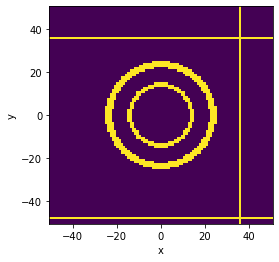

In [108]:
# Generate test image for reconstruction
image = np.zeros((100,100))
image[2,:] = 1
image[-15,:] = 1
image[:,-15] = 1
# plt.imshow(image) 

size = np.shape(image)[0]
x = np.linspace(-size//2, size//2, size)
y = x.copy()
xx, yy = np.meshgrid(x, y)
z = image


z[np.sqrt(xx**2 + yy**2)< 25] = 1
z[np.sqrt(xx**2 + yy**2)< 22] = 0

z[np.sqrt(xx**2 + yy**2)< 15] = 1
z[np.sqrt(xx**2 + yy**2)< 13] = 0
# plt.imshow(z)

# Create interpolant
f = interpolate.interp2d(x, y, z, kind='linear')

# Plot interpolated function
plt.figure(figsize=(4,4))
plt.pcolormesh(x,y, f(x,y), shading='auto')
plt.xlabel('x')
plt.ylabel('y')
# plt.colorbar()

Text(0, 0.5, 'y')

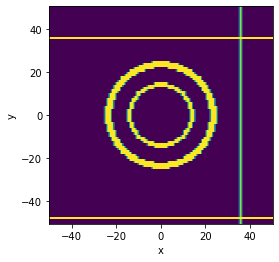

In [109]:
# Plot interpolated function
xnew = np.linspace(-size//2, size//2, 4*size)
ynew = x.copy()
plt.figure(figsize=(4,4))
plt.pcolormesh(xnew,ynew, f(xnew,ynew), shading='auto')
plt.xlabel('x')
plt.ylabel('y')

Transform into plane polars by interpolation

Text(0, 0.5, 'r')

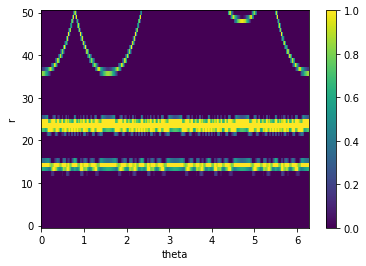

In [110]:
# Transform into plane polars (r, theta)
# r goes from 0 to sqrt(x_max**2 + y_max**2)
# theta goes from 0 to 360
r_max = size//2
r = np.linspace(0, r_max)
theta = np.arange(0,360, 1)/360 * 2*np.pi

xs = (r[:, np.newaxis]*np.cos(theta[np.newaxis,:]))
ys = (r[:, np.newaxis]*np.sin(theta[np.newaxis,:]))

xs = xs.flatten()
ys = ys.flatten()

result = np.zeros(len(ys))
for i in range(len(xs)):
    result[i]= f(xs[i], ys[i])

plt.pcolormesh(theta,r ,result.reshape((50,360)), shading='auto')
plt.colorbar()
plt.xlabel('theta')
plt.ylabel('r')

In [83]:
result.shape

(18000,)

18000

In [49]:
interpolated

array([[-5.95855132e-28, -5.95855132e-28, -5.95855132e-28,
        -5.95855132e-28],
       [-5.95855132e-28, -5.95855132e-28, -5.95855132e-28,
        -5.95855132e-28],
       [-5.95855132e-28, -5.95855132e-28, -5.95855132e-28,
        -5.95855132e-28],
       [-5.95855132e-28, -5.95855132e-28, -5.95855132e-28,
        -5.95855132e-28]])

In [6]:
def catesian_to_polar(array):
    # Input: square array
    # Need to resample
    # Output: 
    return